とりあえず基礎分析的なもの

In [18]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from multiprocessing import Pool
from pandas.io.json import json_normalize

%matplotlib inline

In [49]:
# 拾い物 https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields/notebook

def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [column+'.'+subcolumn for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

In [50]:
train_df = load_df(csv_path='../input/train.csv')
test_df = load_df(csv_path='../input/test.csv')

In [71]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%d')
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y%m%d')

In [65]:
df = train_df.append(test_df)
df.head()

/home/fujiwara/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,channelGrouping,date,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(not set),NaN,NaN,(not provided),organic,NaN,google,1472830385,1,1472830385
1,Organic Search,20160902,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(not set),NaN,NaN,(not provided),organic,NaN,google,1472880147,1,1472880147
2,Organic Search,20160902,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(not set),NaN,NaN,(not provided),organic,NaN,google,1472865386,1,1472865386
3,Organic Search,20160902,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(not set),NaN,NaN,google + online,organic,NaN,google,1472881213,1,1472881213
4,Organic Search,20160902,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,...,(not set),NaN,True,(not provided),organic,NaN,google,1472822600,2,1472822600


In [67]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

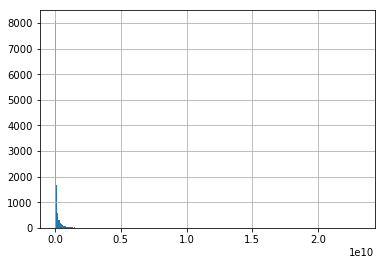

In [52]:
# これがTargetだそうです
df['totals.transactionRevenue'].astype(float).dropna().hist(bins=255)

In [76]:
# dtype check
df.dtypes

channelGrouping                                              object
date                                                 datetime64[ns]
device.browser                                               object
device.browserSize                                           object
device.browserVersion                                        object
device.deviceCategory                                        object
device.flashVersion                                          object
device.isMobile                                                bool
device.language                                              object
device.mobileDeviceBranding                                  object
device.mobileDeviceInfo                                      object
device.mobileDeviceMarketingName                             object
device.mobileDeviceModel                                     object
device.mobileInputSelector                                   object
device.operatingSystem                          

In [56]:
df.channelGrouping.value_counts()

Organic Search    738963
Social            354971
Direct            273134
Referral          211307
Display            51283
Paid Search        45627
Affiliates         32915
(Other)              137
Name: channelGrouping, dtype: int64

2017/8あたりでtestとtrainが分離されてるぽいす

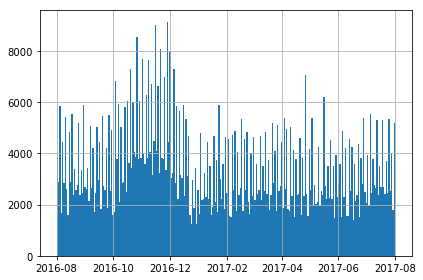

In [74]:
train_df['date'].hist(bins=255)
plt.tight_layout()

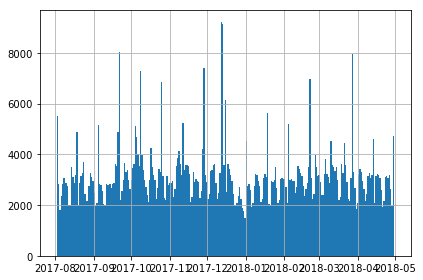

In [75]:
test_df['date'].hist(bins=255)
plt.tight_layout()